Exploratory Data Analysis

# Exploratory Data Analysis


### STEP 1: Understanding the data  




In [6]:
# Load the dataset from a CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# pd.set_option("max_columns",200) --- not needed for this dataset since we only have 7 columns

# Load the dataset
df = pd.read_csv("ACME-HappinessSurvey2020.csv")


print("\nDataframe Shape: ", df.shape)  # 126 rows , 7 columns
# Print out the first few rows of the dataframe
# Display the first few rows of the dataframe
print("\nDataframe HEAD: ", df.head())

# Get a summary of the dataframe
print("\nDataframe Summary: ", df.describe())

# List out all columns of the dataframe

print("\nDataframe Columns: ", df.columns)

print("\nDataframe Dtypes: ", df.dtypes)
# Check for missing values
print("\nMissing Values count: ", df.isnull().sum())



Dataframe Shape:  (126, 7)

Dataframe HEAD:     Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5

Dataframe Summary:                  Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std      0.499714    0.800000    1.114892    1.023440    0.875776    1.147641   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000   
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000   
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               X6  
count  12

# Step 2 : Data Preparation / Cleaning 
### (not required here since our data has no missing values and is all integers) 



# Step 3: Feature Understanding / Univariate Analysis

Understand distribution of features and find some potential outliers in the dataset

X1
5    65
4    40
3    20
1     1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

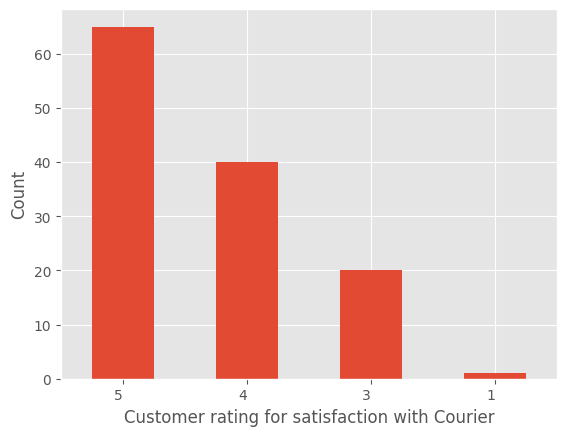

In [7]:


'''
Univariate analysis is a statistical method that examines a single variable in a 
data set. It's a fundamental type of data analysis that's used to describe 
and summarize data. 

Single column in a database is a Series
'''
# values_counts counts how many unique values occured
# and orders them from most to least occuring value range


print(df["X1"].value_counts())


# Plotting the X1 value counts
df["X1"].value_counts().plot(kind='bar')


# Fix for horizontal x-axis labels
plt.xticks(rotation=0, ha="right")

plt.xlabel('Customer rating for satisfaction with Courier')

plt.ylabel('Count')

# Plot the distribution of each feature
# This is a good way to visualize the distribution of each feature
# df.hist(bins=15, figsize=(15, 10))
# plt.suptitle('Feature Distributions')
# plt.show()

# # Correlation matrix
# # This is a good way to visualize the correlation between features
# corr = df.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# # Boxplot for each feature
# # This is a good way to visualize the distribution of each feature
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=df)
# plt.title('Boxplot of Features')
# plt.xticks(rotation=90)
# plt.show()


# Get Distribution of Column Using Histogram

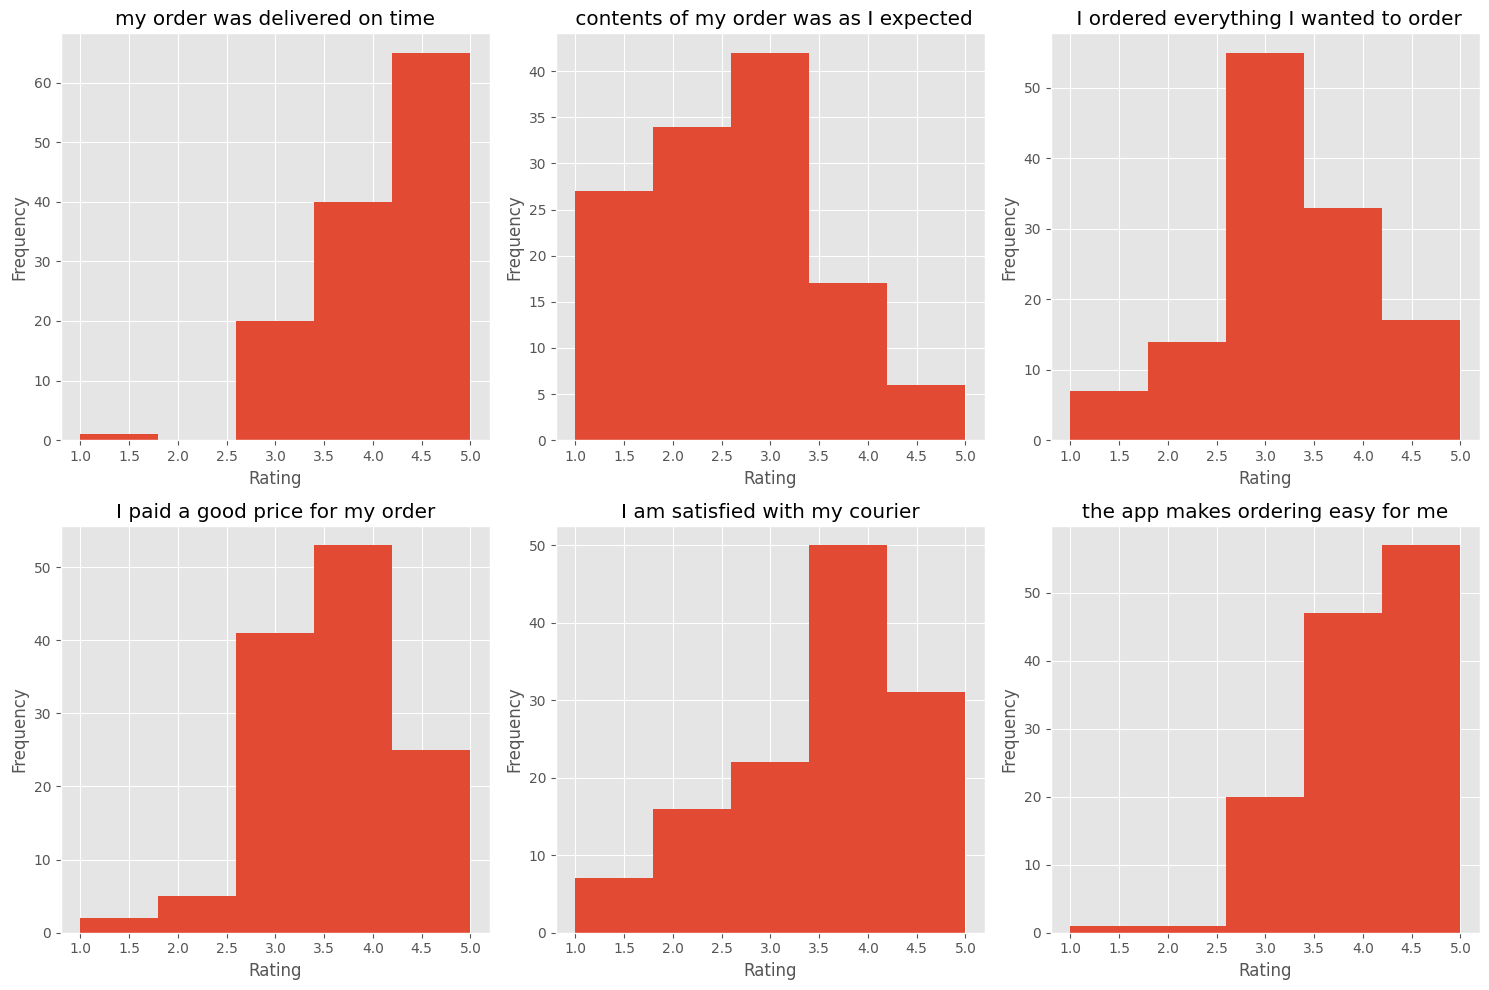

In [8]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Create a histogram for each feature
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
meaning = ["my order was delivered on time",
           " contents of my order was as I expected",
           " I ordered everything I wanted to order",
           "I paid a good price for my order",
           "I am satisfied with my courier",
           "the app makes ordering easy for me"]
for i, feature in enumerate(features):
    ax = axs[i // 3, i % 3]  # get the current subplot
    df[feature].plot(kind='hist', bins=5, ax=ax)
    ax.set_title(meaning[i])  # set the title to the feature name
    ax.set_xlabel('Rating')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


# Kernel Density PLot (KDE Analysis)

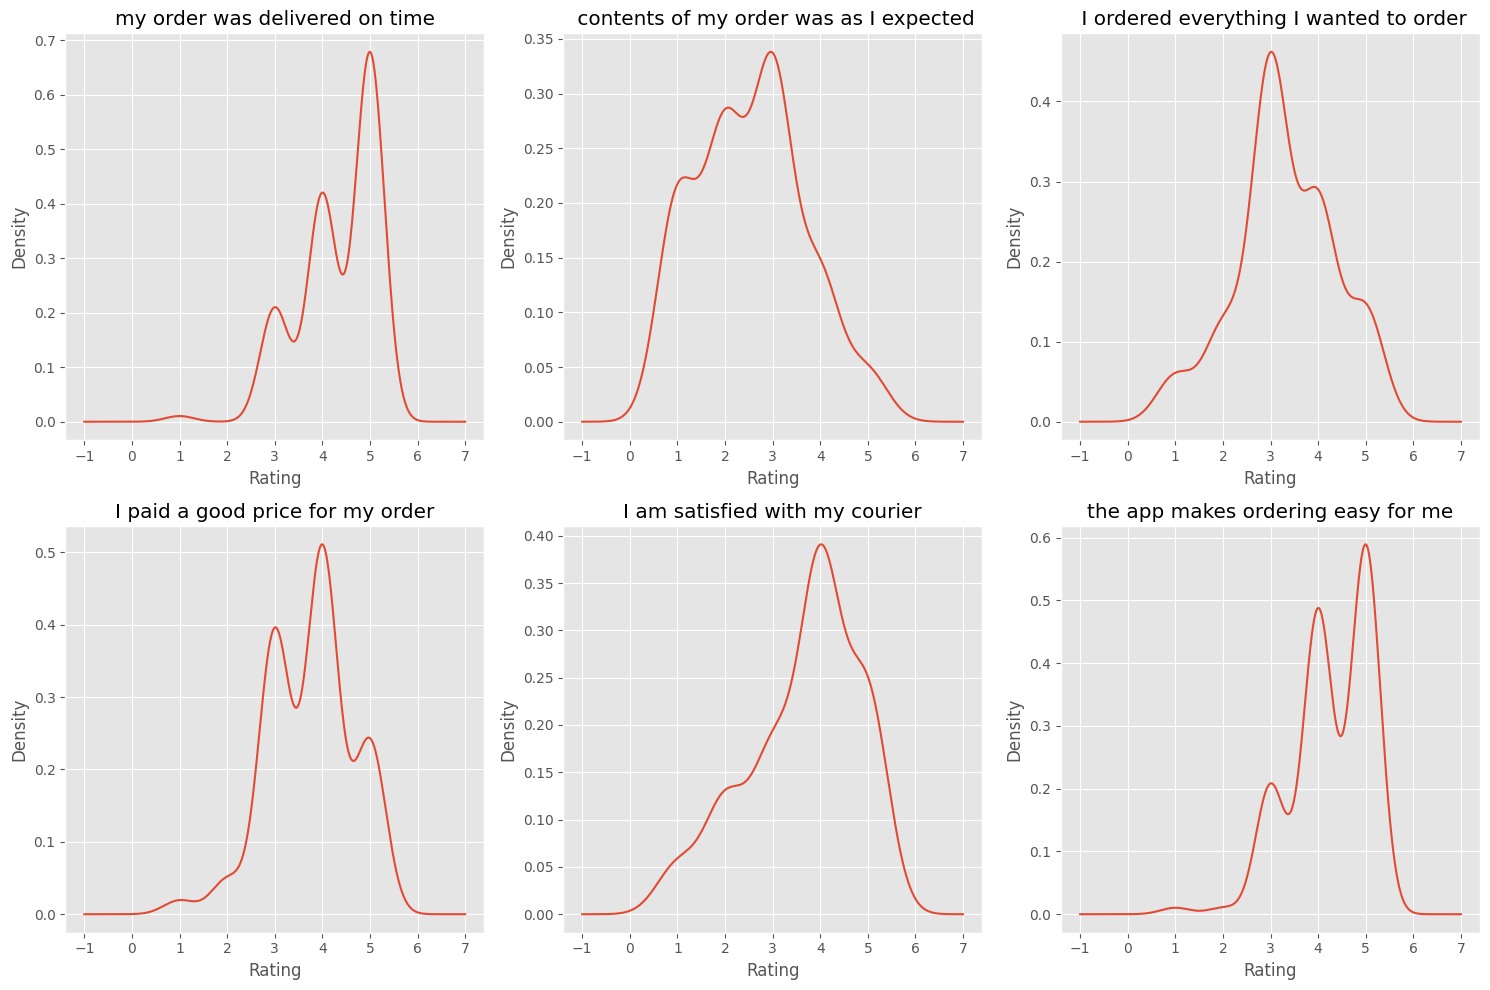

In [21]:


# Create a figure with a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Create a histogram for each feature
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
meaning = ["my order was delivered on time",
           " contents of my order was as I expected",
           " I ordered everything I wanted to order",
           "I paid a good price for my order",
           "I am satisfied with my courier",
           "the app makes ordering easy for me"]
for i, feature in enumerate(features):
    ax = axs[i // 3, i % 3]  # get the current subplot
    df[feature].plot(kind='kde', ax=ax)
    ax.set_title(meaning[i])  # set the title to the feature name
    ax.set_xlabel('Rating')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

# Percentage Analysis

Results:  {'my order was delivered on time': {'Below 3': np.float64(0.7936507936507936), 'Above 3': np.float64(99.20634920634922)}, ' contents of my order was as I expected': {'Below 3': np.float64(48.41269841269841), 'Above 3': np.float64(51.587301587301596)}, ' I ordered everything I wanted to order': {'Below 3': np.float64(16.666666666666664), 'Above 3': np.float64(83.33333333333334)}, 'I paid a good price for my order': {'Below 3': np.float64(5.555555555555555), 'Above 3': np.float64(94.44444444444444)}, 'I am satisfied with my courier': {'Below 3': np.float64(18.253968253968253), 'Above 3': np.float64(81.74603174603175)}, 'the app makes ordering easy for me': {'Below 3': np.float64(1.5873015873015872), 'Above 3': np.float64(98.4126984126984)}}


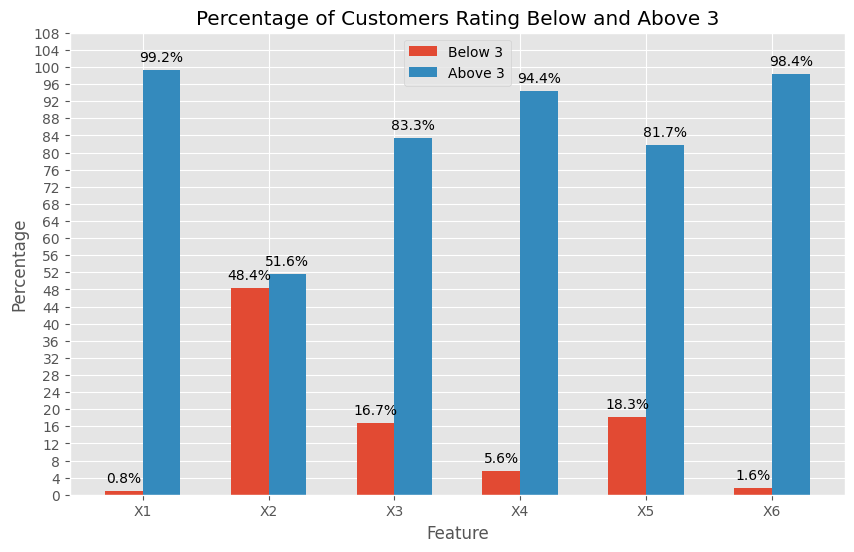

In [ ]:



# Create a dictionary to store the results
results = {}

# Loop through each feature
for feature, mean in zip(features, meaning):
    # Calculate the percentage of customers rating below 3
    below_3 = (df[feature] < 3).sum() / len(df[feature]) * 100
    # Calculate the percentage of customers rating above 3
    above_3 = (df[feature] >= 3).sum() / len(df[feature]) * 100
    # Store the results in the dictionary
    results[mean] = {
        'Below 3': below_3,
        'Above 3': above_3
    }
print("Results: ",results)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot with thin bars and separate bars for each feature
bar_width = 0.3
x = np.arange(len(features))
ax.bar(x - bar_width/2, [values['Below 3']
       for values in results.values()], width=bar_width, label='Below 3')
ax.bar(x + bar_width/2, [values['Above 3']
       for values in results.values()], width=bar_width, label='Above 3')

# Add annotations to show the percentage values
for i, (below, above) in enumerate(zip([values['Below 3'] for values in results.values()], [values['Above 3'] for values in results.values()])):
    ax.text(x[i] - bar_width/2, below + 2, f"{below:.1f}%", ha='center')
    ax.text(x[i] + bar_width/2, above + 2, f"{above:.1f}%", ha='center')

# Set the title and labels
ax.set_title('Percentage of Customers Rating Below and Above 3')
ax.set_xlabel('Feature')
ax.set_ylabel('Percentage')

# Set the xticks to the feature labels
ax.set_xticks(x)
ax.set_xticklabels(features)

# Set the y-axis scale to be more detailed
ax.set_yticks(np.arange(0, 110, 4))
# Add a legend
ax.legend()

# Show the plot
plt.show()

# Observations:

### X1: my order was delivered on time
majority of the data is between 4-5 (good) 
minority have rated 1 

### X2: contents of my order was as I expected
Most people have rated 3 or lower (bad)  
minority have rated 5
### X3: I ordered everything I wanted to order
Most people have rated 3 or above (good) 
minorty have rated below 3
### X4: I paid a good price for my order
Most people have rated 3 or above (good)
minorty have rated below 3

### X5: I am satisfied with my courier
Majority have rated 3.5 or above (good)
### X6: the app makes ordering easy for me
Majority have rated 3 or above (good)
### Conclusion:
1. Majority of the customers are happy with the Courier Service
2. Almost half of the packages are being delivered with incorrect items 
3. Most customers (~ 83 %) have ordered what they wanted to order
4. Almost all customers think pricing for products and service is good (~ 94 %)
5. Most customers are happy with the corier service (~ 82 %)
6. Almost all are happy with the app as it makes ordering easy for them (~ 98.4 %)

# STEP 4:  Feature Relationships

### Scatter Plots (Don't seem viable for this dataset as data does not have enough variation)

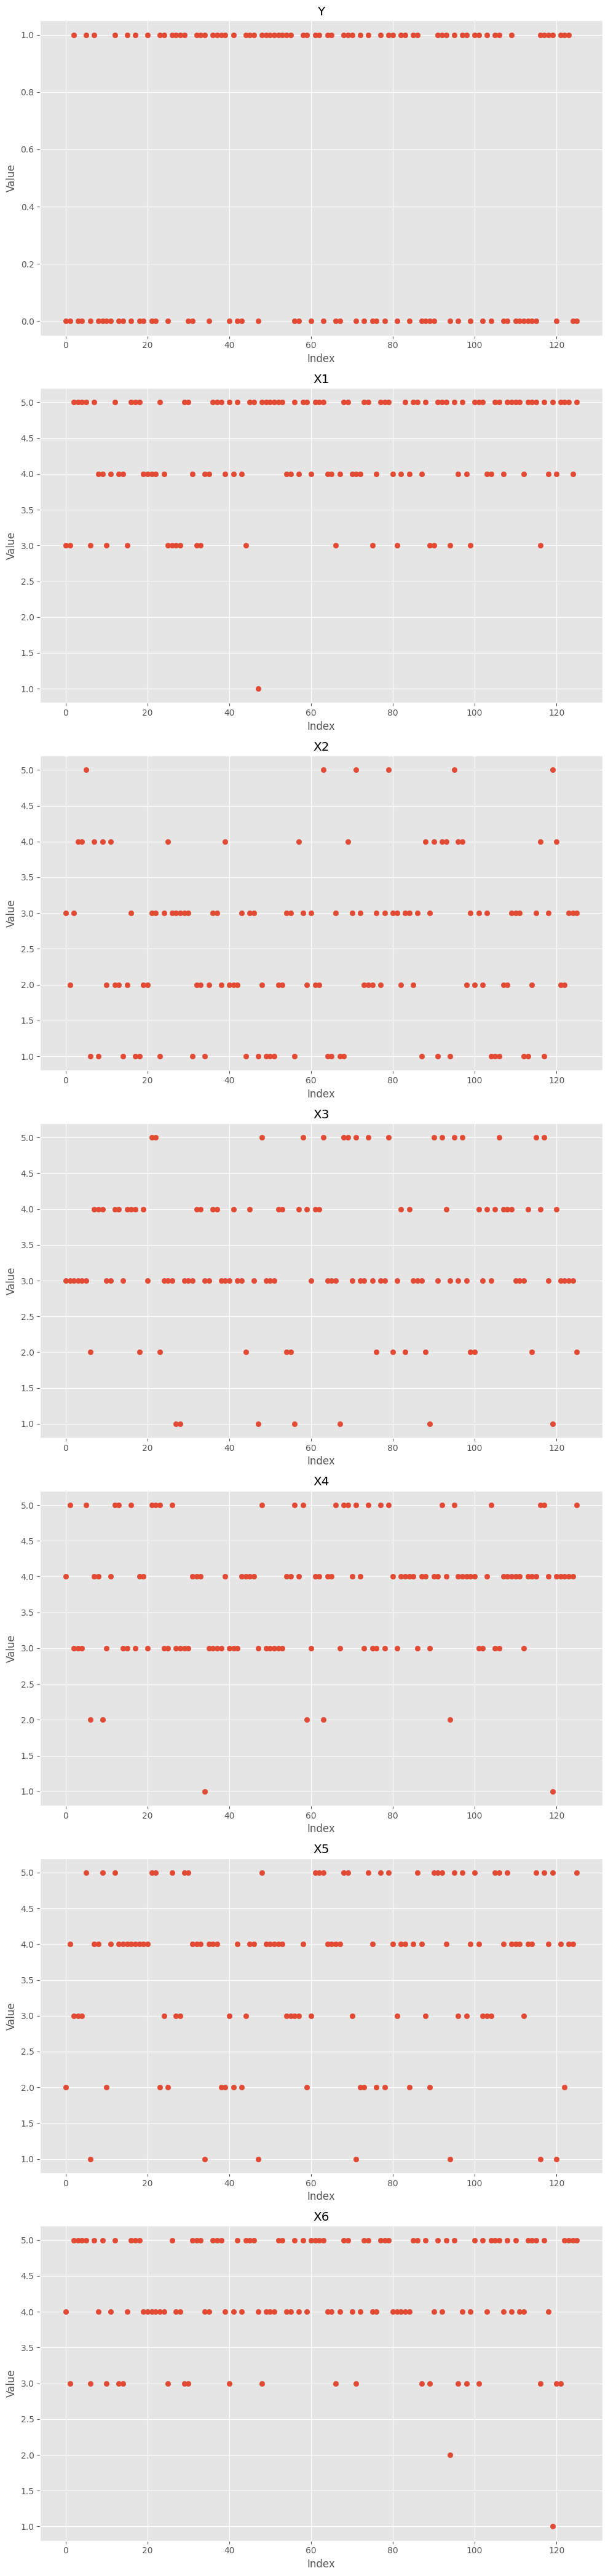

In [36]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(10, 6*len(df.columns)))

# Loop through each feature
for i, feature in enumerate(df.columns):
    # Create a scatter plot for the feature
    axs[i].scatter(range(len(df)), df[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

# K means Clustering 

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Create a dataframe
df = pd.DataFrame(np.random.rand(100, 2), columns=['Feature1', 'Feature2'])

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='red')
plt.show()

ModuleNotFoundError: No module named 'sklearn'